# Non-repeated Two-factor Analysis of Variance

# 1. Data import

In [1]:
import pandas as pd

df = pd.read_excel('Yield (non-repeated two factors).xlsx')
df.head()

,Temperature,Material,Yield
0,1,1,97.6
1,1,2,97.3
2,1,3,96.7
3,2,1,98.6
4,2,2,98.2


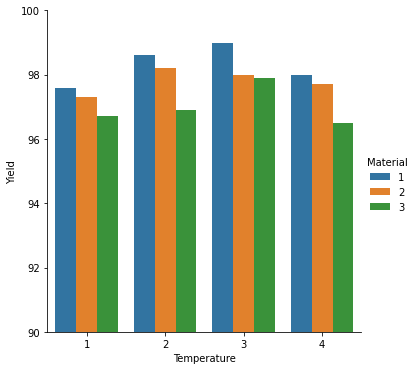

In [17]:
import seaborn as sns
ax = sns.catplot(x="Temperature", y="Yield", hue="Material", data=df, kind="bar");
ax=ax.set(ylim=(90, 100))

# 2. Analysis

## 2.1 Analysis of variance

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('Yield ~ C(Temperature)+C(Material)', df).fit()
table = sm.stats.anova_lm(lm)
print(table)

                 df  sum_sq   mean_sq          F    PR(>F)
C(Temperature)  3.0    2.22  0.740000   7.928571  0.016470
C(Material)     2.0    3.44  1.720000  18.428571  0.002744
Residual        6.0    0.56  0.093333        NaN       NaN


## 2.2. Post-hoc test

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['Yield'], groups=df['Temperature'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=df['Yield'], groups=df['Material'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      0.7 0.6275 -1.1491 2.5491  False
     1      3      1.1 0.2982 -0.7491 2.9491  False
     1      4      0.2    0.9 -1.6491 2.0491  False
     2      3      0.4 0.8933 -1.4491 2.2491  False
     2      4     -0.5 0.8047 -2.3491 1.3491  False
     3      4     -0.9 0.4514 -2.7491 0.9491  False
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     -0.5 0.4455 -1.5963  0.5963  False
     1      3     -1.3 0.0223 -2.3963 -0.2037   True
     2      3     -0.8  0.159 -1.8963  0.2963  False
----------------------------------------------------


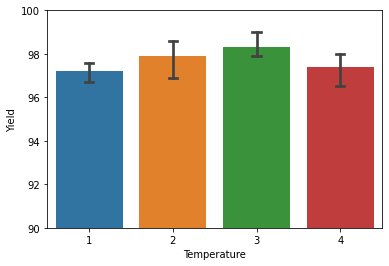

In [13]:
ax=sns.barplot(x=df['Temperature'],y=df['Yield'],capsize=.1) # the cap is SE
ax=ax.set(ylim=(90, 100))

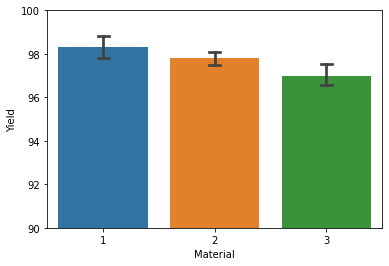

In [15]:
ax=sns.barplot(x=df['Material'],y=df['Yield'],capsize=.1) # the cap is SE
ax=ax.set(ylim=(90, 100))